## APRISA IDMA MUTIARA
## 2209106001
## KECERDASAN BUATAN A1 22

DATASET:
https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste/


Mendownloand dataset dari kaggle langsung

In [1]:
!pip install -q Kaggle

In [2]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

 97% 304M/312M [00:02<00:00, 143MB/s]
100% 312M/312M [00:02<00:00, 110MB/s]


Melakukan unzip terhadap file sea-animals-image-dataste.zip

In [38]:
!unzip 'sea-animals-image-dataste.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Seahorse/9891995103_849905035f_o.jpg  
  inflating: Seahorse/9984393_fb8ac77d6a_o.jpg  
  inflating: Seahorse/Sea Horse (1).jpg  
  inflating: Seahorse/Sea Horse (10).jpg  
  inflating: Seahorse/Sea Horse (11).jpg  
  inflating: Seahorse/Sea Horse (12).jpg  
  inflating: Seahorse/Sea Horse (13).jpg  
  inflating: Seahorse/Sea Horse (14).jpg  
  inflating: Seahorse/Sea Horse (15).jpg  
  inflating: Seahorse/Sea Horse (16).jpg  
  inflating: Seahorse/Sea Horse (17).jpg  
  inflating: Seahorse/Sea Horse (18).jpg  
  inflating: Seahorse/Sea Horse (19).jpg  
  inflating: Seahorse/Sea Horse (2).jpg  
  inflating: Seahorse/Sea Horse (20).jpg  
  inflating: Seahorse/Sea Horse (21).jpg  
  inflating: Seahorse/Sea Horse (22).jpg  
  inflating: Seahorse/Sea Horse (23).jpg  
  inflating: Seahorse/Sea Horse (24).jpg  
  inflating: Seahorse/Sea Horse (25).jpg  
  inflating: Seahorse/Sea Horse (26).jpg  
  inflating: Seahorse/Sea

Membuat folder dataset-final

In [17]:
!mkdir dataset-final

Menyalin 3 kelas dari sea animals image dataste yaitu jellyfish, penguin, shrimp.

In [28]:
!cp -r 'sea-animals-image-dataste/Jelly Fish/' dataset-final/
!cp -r sea-animals-image-dataste/Penguin/ dataset-final/
!cp -r sea-animals-image-dataste/Shrimp/ dataset-final/

Install dan import library.

In [6]:
!pip install split-folders

In [7]:
import splitfolders

Membagi data menjadi test, train dan validasi dengan ratio 80%, 10%, 10% di dalam file baru yaitu sea-animals.

In [29]:
splitfolders.ratio ("dataset-final",
                    output="sea-animals",
                    # mirip random state
                    seed=1337,
                    ratio=(.8, .1, .1))

Copying files: 1815 files [00:00, 7987.05 files/s]


Import library ImageDataGenerator.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Melakukan image augmentation dengan membuat variabel train_datagen dan valtest_datagen.

In [30]:
train_datagen = ImageDataGenerator(
                rescale=1/255,
                horizontal_flip=True,
                width_shift_range=0.2,
                height_shift_range=0.2,
                brightness_range = (0.3, 0.9),
                zoom_range=0.2)

valtest_datagen = ImageDataGenerator(
                rescale=1/255)

Gunakan variabel di atas ke dalam train_generator, val_generator dan test_generator. Dengan target_size nya 300 x 300 dan batch_size 64 dengan kelas categorical.

In [49]:
train_generator = train_datagen.flow_from_directory(
    # copy path folder
    '/content/sea-animals/train',
    target_size=(300, 300),
    # bakal update bobotnya setiap batch_size (64) gambar
    batch_size=64,
    # sesuaikan dengan klasifikasi
    class_mode='categorical'
)

val_generator = valtest_datagen.flow_from_directory(
    '/content/sea-animals/val',
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

test_generator = valtest_datagen.flow_from_directory(
    '/content/sea-animals/test',
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

Found 1451 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 184 images belonging to 3 classes.


Import library

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Menggunakan model sequential dengan 13 layer menggunakan activation relu dan pada input_shape nya sebanyak (300, 300, 3).

In [50]:
model = Sequential([
    #Feature extraction layer
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Fully-connected layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 150, 150, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      4640      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 36, 36, 64)       

Menggunakan callbacks

In [51]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights = True)

Melakukan model compile dengan loss categorical_crossentropy karena pada class mode dibagian sebelumnya menggunakan categorical, optimizer nya menggunakan adam dan metrics accuracy.

In [52]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Membuat variabel fitmodel yang berisi model fit dengan melakukan iterasi sebanyak 15 kali dan beberapa fungsi lain yang berada di bawah ini.

In [53]:
fitmodel = model.fit(train_generator,
            validation_data = val_generator,
            epochs=15,
            verbose = 1,
            callbacks=[callback])

Epoch 1/15
23/23 [==============================] - 37s 2s/step - loss: 0.7640 - accuracy: 0.6630 - val_loss: 0.5358 - val_accuracy: 0.8056
Epoch 2/15
23/23 [==============================] - 37s 2s/step - loss: 0.5446 - accuracy: 0.7967 - val_loss: 0.5076 - val_accuracy: 0.8000
Epoch 3/15
23/23 [==============================] - 36s 2s/step - loss: 0.4910 - accuracy: 0.8119 - val_loss: 0.5451 - val_accuracy: 0.8056
Epoch 4/15
23/23 [==============================] - 35s 2s/step - loss: 0.5220 - accuracy: 0.8139 - val_loss: 0.5121 - val_accuracy: 0.8056
Epoch 5/15
23/23 [==============================] - 34s 1s/step - loss: 0.4897 - accuracy: 0.8132 - val_loss: 0.5961 - val_accuracy: 0.7944
Epoch 6/15
23/23 [==============================] - 35s 1s/step - loss: 0.5232 - accuracy: 0.8070 - val_loss: 0.4796 - val_accuracy: 0.8167
Epoch 7/15
23/23 [==============================] - 35s 2s/step - loss: 0.4689 - accuracy: 0.8222 - val_loss: 0.4986 - val_accuracy: 0.8167
Epoch 8/15
23/23 [==

Didapatkan akurasi akhir 0.7445651888847351.

In [54]:
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))

print("Loss:", loss)
print("Accuracy:", accuracy)

3/3 [==============================] - 1s 181ms/step - loss: 0.6472 - accuracy: 0.7446
Loss: 0.6472389101982117
Accuracy: 0.7445651888847351


Membuat dan menampilkan grafik dari training dan validasi akurasi dan juga training dan validasi los.

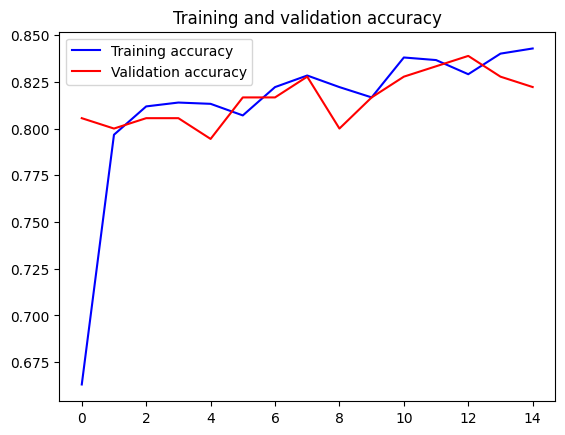

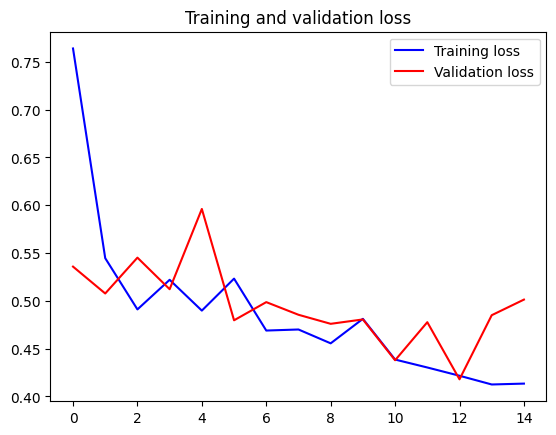

In [55]:
import matplotlib.pyplot as plt

accuracy = fitmodel.history['accuracy']
val_accuracy = fitmodel.history['val_accuracy']

loss = fitmodel.history['loss']
val_loss = fitmodel.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()